In [154]:
DATA_PATH = "../data/data_divisor/"
SRS_PATH_DICT = {
    "man":"srs_manner",
    "tot":"srs_total",
    "mot":"srs_mot",
    "comm":"srs_comm",
    "cog":"srs_cog",
    "awa":"srs_awar",
    
}
SRS_NAMES_DICT = {
    "man":"MANNERISMS",
    "tot":"TOTAL",
    "mot":"MOTIVATION",
    "cog":"COGNITION",
    "comm":"COMMUNICATION",
    "awa":"AWARENESS",
    
}

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [156]:
# Set experiment parameters
age_range = None # (min_age, max_age) --- df['AGE_AT_SCAN ']
groupsToBeCompared = ("TD", "mild")  # df['categories_{SRS_BEHAVIORAL}']
SRS_TEST = "awa" 

In [157]:
df = pd.read_csv(os.path.join(DATA_PATH, SRS_PATH_DICT[SRS_TEST], f"perc_SRS_{SRS_NAMES_DICT[SRS_TEST]}_T.csv"), index_col=0)

In [138]:
(df[f'categories_{SRS_NAMES_DICT[SRS_TEST]}']==groupsToBeCompared[0]).sum(), (df[f'categories_{SRS_NAMES_DICT[SRS_TEST]}']==groupsToBeCompared[1]).sum()

(445, 74)

In [139]:
subjs_g0 = df[df[f'categories_{SRS_NAMES_DICT[SRS_TEST]}']==groupsToBeCompared[0]].index
subjs_g1 = df[df[f'categories_{SRS_NAMES_DICT[SRS_TEST]}']==groupsToBeCompared[1]].index


In [140]:
age0 = df.loc[subjs_g0, ['AGE_AT_SCAN ']]
age1 = df.loc[subjs_g1, ['AGE_AT_SCAN ']]

In [141]:
age1.columns=['AGE_AT_SCAN_ASD']
age0.columns=['AGE_AT_SCAN_TD']


In [142]:
age = pd.concat([age0,age1], axis=1, join='outer',)

<AxesSubplot:>

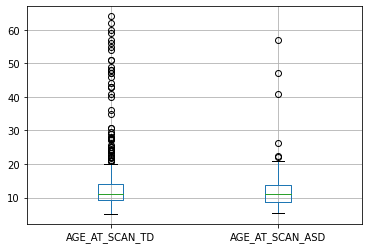

In [143]:
age.boxplot()

In [145]:
gender0 = df.loc[subjs_g0, ['SEX']]
gender1 = df.loc[subjs_g1, ['SEX']]

In [146]:
gender1.columns=['SEX_ASD']
gender0.columns=['SEX_TD']


In [147]:
gender = pd.concat([gender0,gender1], axis=1, join='outer',)

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

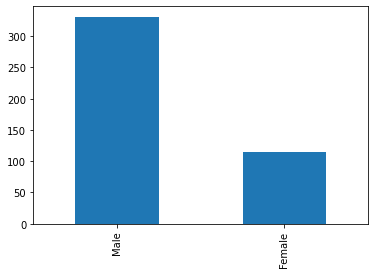

In [153]:
ax = gender['SEX_TD'].value_counts().plot.bar()
ax.set_xticklabels(['Male','Female'])

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

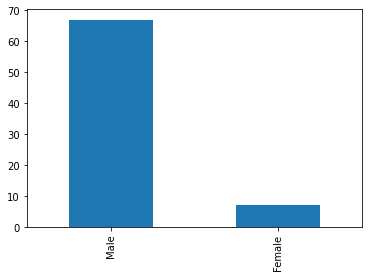

In [152]:
ax = gender['SEX_ASD'].value_counts().plot.bar()
ax.set_xticklabels(['Male','Female'])

In [150]:
males = gender['SEX_TD'].value_counts()[1]
females = gender['SEX_TD'].value_counts()[2]
femalePerc = females/(males+females)
femalePerc

0.25617977528089886

In [151]:
males = gender['SEX_ASD'].value_counts()[1]
females = gender['SEX_ASD'].value_counts()[2]
femalePerc = females/(males+females)
femalePerc

0.0945945945945946

# Hypothesis: Subjects with NaN values in any SRS behavioral test are either TD, or sever.
### Assumingly that they have shown a very strong behavior to support their final diagnosis in the earlier tests. Thus, it wasn't required to conduct any more tests on them

# Experiment:
1. For each SRS test, find all missing subjects.
2. Go to other SRS tests for those subjects and find their scores.
3. If you find they are either sever, or TD in all of the other tests,then the hypothesis is true

In [32]:
df_awa = pd.read_csv(os.path.join(DATA_PATH, SRS_PATH_DICT['awa'], f"perc_SRS_{SRS_NAMES_DICT['awa']}_T.csv"), index_col=0)
df_comm = pd.read_csv(os.path.join(DATA_PATH, SRS_PATH_DICT['comm'], f"perc_SRS_{SRS_NAMES_DICT['comm']}_T.csv"), index_col=0)
df_mot = pd.read_csv(os.path.join(DATA_PATH, SRS_PATH_DICT['mot'], f"perc_SRS_{SRS_NAMES_DICT['mot']}_T.csv"), index_col=0)
df_cog = pd.read_csv(os.path.join(DATA_PATH, SRS_PATH_DICT['cog'], f"perc_SRS_{SRS_NAMES_DICT['cog']}_T.csv"), index_col=0)
df_man = pd.read_csv(os.path.join(DATA_PATH, SRS_PATH_DICT['man'], f"perc_SRS_{SRS_NAMES_DICT['man']}_T.csv"), index_col=0)
df_tot = pd.read_csv(os.path.join(DATA_PATH, SRS_PATH_DICT['tot'], f"perc_SRS_{SRS_NAMES_DICT['tot']}_T.csv"), index_col=0)


In [35]:
# Starting with awarness
awa_missing_subj = df.index[df.isna()['categories_AWARENESS']]
len(awa_missing_subj)

310

In [38]:
df_comm.loc[awa_missing_subj, 'categories_COMMUNICATION'].isna().sum()

(289, 21)

In [46]:
comm_subj = awa_missing_subj[np.where(df_comm.loc[awa_missing_subj,'categories_COMMUNICATION'].notnull())[0]]

In [57]:
df_comm.loc[comm_subj, 'categories_COMMUNICATION'].value_counts()

TD          9
moderate    5
sever       4
mild        3
Name: categories_COMMUNICATION, dtype: int64

In [51]:
df_awa.loc[comm_subj,'categories_AWARENESS'], df_comm.loc[comm_subj, 'categories_COMMUNICATION']

(subj_id
 KUL_3_29676    NaN
 KUL_3_29662    NaN
 KUL_3_29666    NaN
 KUL_3_29799    NaN
 KUL_3_29668    NaN
 KUL_3_29679    NaN
 KUL_3_29664    NaN
 KUL_3_29678    NaN
 KUL_3_29657    NaN
 KUL_3_29658    NaN
 KUL_3_29665    NaN
 KUL_3_29667    NaN
 KUL_3_29800    NaN
 KUL_3_29798    NaN
 KUL_3_29796    NaN
 KUL_3_29794    NaN
 KUL_3_29795    NaN
 KUL_3_29675    NaN
 KUL_3_29669    NaN
 KUL_3_29660    NaN
 KUL_3_29661    NaN
 Name: categories_AWARENESS, dtype: object, subj_id
 KUL_3_29676          TD
 KUL_3_29662          TD
 KUL_3_29666          TD
 KUL_3_29799    moderate
 KUL_3_29668    moderate
 KUL_3_29679          TD
 KUL_3_29664          TD
 KUL_3_29678          TD
 KUL_3_29657        mild
 KUL_3_29658          TD
 KUL_3_29665          TD
 KUL_3_29667    moderate
 KUL_3_29800       sever
 KUL_3_29798    moderate
 KUL_3_29796       sever
 KUL_3_29794        mild
 KUL_3_29795    moderate
 KUL_3_29675       sever
 KUL_3_29669          TD
 KUL_3_29660        mild
 KUL_3_29661       

In [54]:
df_cog.loc[awa_missing_subj,'categories_COGNITION'].notnull().sum()

0

In [55]:
df_tot.loc[awa_missing_subj,'categories_TOTAL'].notnull().sum()

28

In [67]:
man_subj = awa_missing_subj[np.where(df_man.loc[awa_missing_subj,'categories_MANNERISMS'].notnull())[0]]

In [68]:
df_man.loc[man_subj,'categories_MANNERISMS']


subj_id
KUL_3_29676          TD
KUL_3_29662    moderate
KUL_3_29666          TD
KUL_3_29799       sever
KUL_3_29668        mild
KUL_3_29679    moderate
KUL_3_29664          TD
KUL_3_29678        mild
KUL_3_29657        mild
KUL_3_29658          TD
KUL_3_29665          TD
KUL_3_29667    moderate
KUL_3_29800       sever
KUL_3_29798    moderate
KUL_3_29796    moderate
KUL_3_29794          TD
KUL_3_29795    moderate
KUL_3_29675    moderate
KUL_3_29669          TD
KUL_3_29660    moderate
KUL_3_29661    moderate
Name: categories_MANNERISMS, dtype: object